# Volume 4: Lorenz Equations
    Benj McMullin
    Math 437
    10/19/2023

In [20]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation as FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import linregress

In [21]:
%matplotlib inline

## Problem 1
Write a function that implements the Lorenz equations. Let $\sigma = 10$, $\rho = 28$, $\beta = 8/3$ . Make a 3D plot of a solution to the Lorenz equations for an initial condition where $(x, y, z)$ are drawn randomly from a uniform distribution from −15 to 15. As usual, use `scipy.integrate.solve_ivp` to compute the solution.

In [22]:
def lorenz(t, x):
    """Implements Lorenz equations:
    
    dx/dt = σ(y − x)
    dy/dt = ρx − y − xz
    dz/dt = xy − βz
        
    Parameters:
        t (float): The time value t
        x ((3,) ndarray): The state values (x,y,z)
    Returns:
        ((3,) ndarray): The derivative values
    """
    # Set parameters for the Lorenz system
    d_x = 10 * (x[1] - x[0])
    d_y = 28 * x[0] - x[1] - x[0] * x[2]
    d_z = x[0] * x[1] - (8 / 3) * x[2]
    
    return np.array([d_x, d_y, d_z])

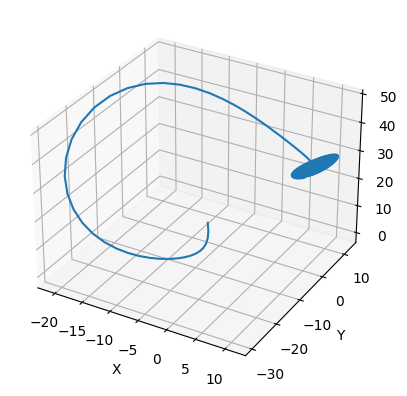

In [23]:
# Set initial conditions and time span
x0 = np.random.uniform(-15, 15, 3)
t_span = (0, 25)

# Solve the system
sol = solve_ivp(lorenz, t_span, x0, max_step = 0.01)

# Plot the solution
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot(sol.y[0], sol.y[1], sol.y[2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

## Problem 2
To better visualize the Lorenz attractor, produce a single 3D plot displaying three solutions to the Lorenz equations, each with random initial conditions.

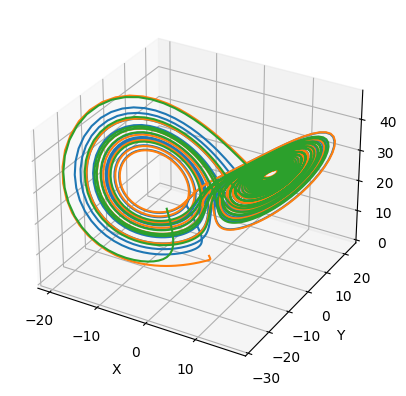

In [24]:
# Path: lorenz_equations.ipynb
x_1 = np.random.uniform(-15, 15, 3)
x_2 = np.random.uniform(-15, 15, 3)
x_3 = np.random.uniform(-15, 15, 3)
t_span = (0, 25)

# Solve the system
sol_1 = solve_ivp(lorenz, t_span, x_1, max_step = 0.01)
sol_2 = solve_ivp(lorenz, t_span, x_2, max_step = 0.01)
sol_3 = solve_ivp(lorenz, t_span, x_3, max_step = 0.01)

# Plot the solution
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(sol_1.y[0], sol_1.y[1], sol_1.y[2])
ax.plot(sol_2.y[0], sol_2.y[1], sol_2.y[2])
ax.plot(sol_3.y[0], sol_3.y[1], sol_3.y[2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

## Problem 3
Use `matplotlib.animation.FuncAnimation` to produce a 3D animation of two solutions to the Lorenz equations with similar initial conditions. To make similar initial conditions, draw $(x_1,y_1,z_1)$ randomly as before, and then produce $(x_2,y_2,z_2)$ by adding a small perturbation: `np.random.randn(3)*(1e-10)`. It will take several seconds before the separation between the two solutions will be noticeable.

The animation should have a point marker and the past trajectory curve for each solution. Save your animation as `lorenz_animation1.mp4` and embed it into the notebook.

(Recall that you can display the saved animation in a Jupyter notebook by running the follwing code in a markdown cell):

`<video src='lorenz_animation1.mp4' controls>`

In [25]:
# Path: lorenz_equations.ipynb
x_1 = np.random.uniform(-15, 15, 3)
x_2 = x_1 + np.random.randn(3) * (1e-3)
t_span = (0, 25)
sol_1 = solve_ivp(lorenz, t_span, x_1, max_step = 0.01)
sol_2 = solve_ivp(lorenz, t_span, x_2, max_step = 0.01)
plt.ioff()


# Plot the solution
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.set_xlim((-30, 25))
ax.set_ylim((-35, 35))
ax.set_zlim((-10, 50))

# Create the particles
particle_sol_1, = plt.plot([],[],[], marker = 'o', c = 'r')
trajectory_sol_1, = plt.plot([],[],[], alpha = 0.5, c = 'r')
particle_sol_2, = plt.plot([],[],[], marker = 'o', c = 'b')
trajectory_sol_2, = plt.plot([],[],[], alpha = 0.5, c = 'b')

# Create the function that will do the updating of the plot
def update(i):
    
    # sol1
    particle_sol_1.set_data(sol_1.y[0, i], sol_1.y[1, i])
    particle_sol_1.set_3d_properties(sol_1.y[2, i])
    trajectory_sol_1.set_data(sol_1.y[0, :i + 1], sol_1.y[1, :i + 1])
    trajectory_sol_1.set_3d_properties(sol_1.y[2, :i + 1])
    
    # sol2
    particle_sol_2.set_data(sol_2.y[0, i], sol_2.y[1, i])
    particle_sol_2.set_3d_properties(sol_2.y[2, i])
    trajectory_sol_2.set_data(sol_2.y[0, :i + 1], sol_2.y[1, :i + 1])
    trajectory_sol_2.set_3d_properties(sol_2.y[2, :i + 1])
    return [particle_sol_1, trajectory_sol_1], [particle_sol_2, trajectory_sol_2]

# Set the axes labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title('Lorenz Solution with a Pertubation')

# Create the animation
plt.ioff()
anim = animation.FuncAnimation(fig, update, frames = range(len(sol_1.y[0])), interval = 10)
animation.writer = animation.writers['ffmpeg']

# Save the animation
anim.save('lorenz_animation1.mp4')

C:\Users\benja\AppData\Local\Temp\ipykernel_13420\1910210984.py:27: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  particle_sol_1.set_data(sol_1.y[0, i], sol_1.y[1, i])
C:\Users\benja\AppData\Local\Temp\ipykernel_13420\1910210984.py:33: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  particle_sol_2.set_data(sol_2.y[0, i], sol_2.y[1, i])


<video src="lorenz_animation1.mp4" controls>

## Problem 4
The `solve_ivp` function allows users to specify error tolerances (similar to setting a value of $h$ for a Runge-Kutta method). Using a single random initial condition, produce two approximations by using the `solve_ivp` arguments `(atol=1e-15, rtol=1e-13)` for the first approximation and `(atol=1e-12, rtol=1e-10)` for the second.
As in the previous problem, use `FuncAnimation` to animate both solutions. Save the animation as `lorenz_animation2.mp4` and embed it into the notebook.

In [26]:
# Path: lorenz_equations.ipynb
x_1 = np.random.uniform(-15, 15, 3)
t_span = (0, 50)
sol_1 = solve_ivp(lorenz, t_span, x_1, t_eval = np.linspace(0, 50, 3000), atol = 1e-15, rtol = 1e-13)
sol_2 = solve_ivp(lorenz, t_span, x_1, t_eval = np.linspace(0, 50, 3000), atol = 1e-12, rtol = 1e-10)
plt.ioff()

# Plot the solution
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.set_xlim((-30, 25))
ax.set_ylim((-35, 35))
ax.set_zlim((-10, 50))

# Create the particles
particle_sol_1, = plt.plot([],[],[], marker = 'o', c = 'r')
trajectory_sol_1, = plt.plot([],[],[], alpha = 0.5, c = 'r')
particle_sol_2, = plt.plot([],[],[], marker='o', c = 'b')
trajectlry_sol_2, = plt.plot([],[],[], alpha = 0.5, c = 'b')

# Create the function that will do the updating of the plot
def update(i):

    # sol1
    particle_sol_1.set_data(sol_1.y[0, i], sol_1.y[1, i])
    particle_sol_1.set_3d_properties(sol_1.y[2, i])
    trajectory_sol_1.set_data(sol_1.y[0, :i + 1], sol_1.y[1, :i + 1])
    trajectory_sol_1.set_3d_properties(sol_1.y[2, :i + 1])
    
    # sol2
    particle_sol_2.set_data(sol_2.y[0, i], sol_2.y[1, i])
    particle_sol_2.set_3d_properties(sol_2.y[2, i])
    trajectlry_sol_2.set_data(sol_2.y[0, :i + 1], sol_2.y[1, :i + 1])
    trajectlry_sol_2.set_3d_properties(sol_2.y[2, :i + 1])
    return [particle_sol_1, trajectory_sol_1], [particle_sol_2, trajectlry_sol_2]

# Set the axes labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title('Lorenz Solution with a Pertubation')

# Create the animation
plt.ioff()
anim = animation.FuncAnimation(fig, update, frames = range(len(sol_1.y[0])), interval = 10)
animation.writer = animation.writers['ffmpeg']

# Save the animation
anim.save('lorenz_animation2.mp4')

C:\Users\benja\AppData\Local\Temp\ipykernel_13420\3318024582.py:25: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  particle_sol_1.set_data(sol_1.y[0, i], sol_1.y[1, i])
C:\Users\benja\AppData\Local\Temp\ipykernel_13420\3318024582.py:31: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  particle_sol_2.set_data(sol_2.y[0, i], sol_2.y[1, i])


<video src="lorenz_animation2.mp4" controls>

## Problem 5
Estimate the Lyapunov exponent of the Lorenz equations by doing the following:
* Produce an initial condition that already lies on the attractor. This can be done by using a random "dummy" initial condition, approximating the resulting solution to the Lorenz system for a short time, and then using the endpoint of that solution (which is now on the attractor) as the desired intital condition.
* Produce a second initial condition by adding a small perturbation to the first (as before).
* For both initial conditions, use `solve_ivp` to produce approximate solutions for $0 \leq t \leq 10$.
* Compute $||\delta(t)||$ by taking the norm of the vector difference between the two solutions for each value of $t$.
* Use `scipy.stats.linregress` to calculate a best-fit line for $\log(||\delta(t)||)$ against $t$.
* The slope of the resulting best-fit line is an approximation of the Lyapunov exponent $\lambda$.

Print your approximation of $\lambda$, and produce a plot similar to Figure 1.3 using `plt.semilogy`.

Hint: Remember that the best-fit line you calculated corresponds to a best-fit exponential for $||\delta(t)||$. If `a` and `b` are the slope and intercept of the best-fit line, the best-fit exponential can be plotted using `plt.semilogy(t,np.exp(a*t+b))`.

In [27]:
# Path: lorenz_equations.ipynb
x_0 = solve_ivp(lorenz, (0, 5), np.random.uniform(-15, 15, 3), max_step = 0.1).y[:, -1]

# Set the time span and solve the system
x_1 = x_0 + np.random.randn(3) * (1e-5)

# Set the time span and solve the system
t_span = (0, 10)
sol_1 = solve_ivp(lorenz, t_span, x_0, max_step = 0.01)
sol_2 = solve_ivp(lorenz, t_span, x_1, max_step = 0.01)

# Use the Euclidean norm to calculate the difference between the solutions
delta_norm = [np.linalg.norm(y) for y in sol_1.y.T - sol_2.y.T]

# Do a linear regression on the log of the difference between the solutions
T = np.linspace(0,10,1002)
linreg = linregress(T,np.log(delta_norm))
a, b = linreg.slope, linreg.intercept

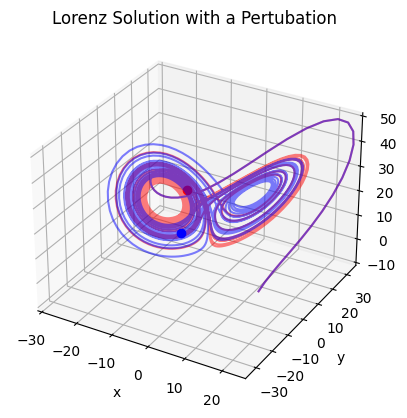

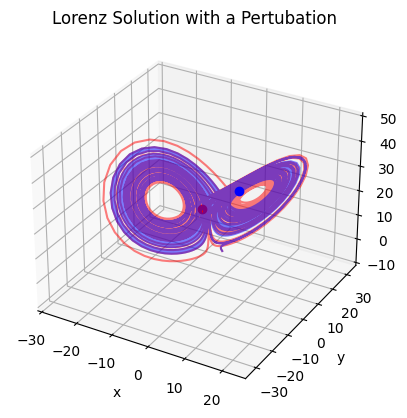

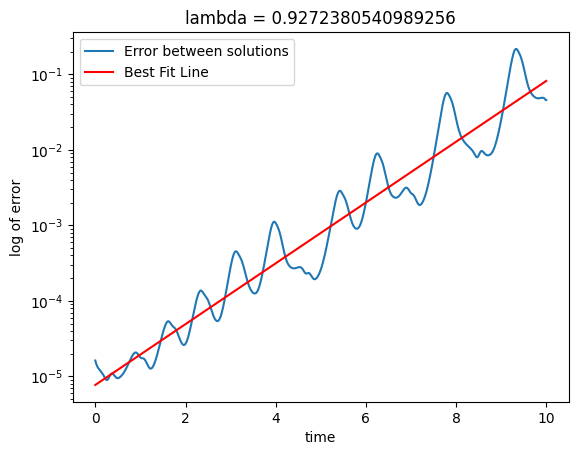

In [28]:
# Plot the solution
fig = plt.figure()
ax = plt.axes()
plt.semilogy(T, delta_norm, label = 'Error between solutions')
plt.semilogy(T, np.exp(a * T + b), label = 'Best Fit Line', c = 'r')
plt.legend()
plt.title('lambda = ' + str(a))
plt.xlabel('time')
plt.ylabel('log of error')
plt.show()